In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-0.005,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':0.045,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':['2021-01-01'],'value':[-70000]},
                'target':'capex'
            }
    ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.15,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':'2021-01-01',
    'end':'2030-01-01',
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 2500, 'scale': 200} bbl/d 
 Di: 0.15 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2030, 1, 1), time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', const_value=-0.005, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', const_value=0.045, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='capex', const_value=None, periods=None, array_values=ChgPts(date=[datetime.date(2021, 1, 1)], value=[-70000.0]), target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, for

In [4]:
fore1 = p1.generate_forecast()
fore1

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:240: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021,2614.099971,0.000000e+00,0,886033.302079,5000.0,2385.900029,0.477180,0.912704,0.000000e+00,0.0,1.003759e+06,1825000.0,pdp
2022,2249.976696,8.860333e+05,0,824324.616278,5000.0,2750.023304,0.550005,1.222245,1.003759e+06,1825000.0,1.060955e+06,1825000.0,pdp
2023,1936.572889,1.648649e+06,0,709502.772394,5000.0,3063.427111,0.612685,1.581881,2.121909e+06,3650000.0,1.167380e+06,1825000.0,pdp
2024,1666.823733,2.305039e+06,0,611391.872361,5000.0,3333.176267,0.666635,1.999717,3.338519e+06,5475000.0,1.260872e+06,1827500.0,pdp
2025,1434.059022,2.871433e+06,0,526229.861263,5000.0,3565.940978,0.713188,2.486607,4.643653e+06,7305000.0,1.339806e+06,1827500.0,pdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,1093.791985,2.975279e+06,9,400732.887550,5000.0,3906.208015,0.781242,3.571253,6.372388e+06,9130000.0,1.453571e+06,1825000.0,pdp
2027,941.435486,3.346013e+06,9,344913.992730,5000.0,4058.564514,0.811713,4.311038,7.853764e+06,10955000.0,1.505308e+06,1825000.0,pdp
2028,810.301032,3.665107e+06,9,297218.869360,5000.0,4189.698968,0.837940,5.170546,9.383004e+06,12780000.0,1.552042e+06,1827500.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

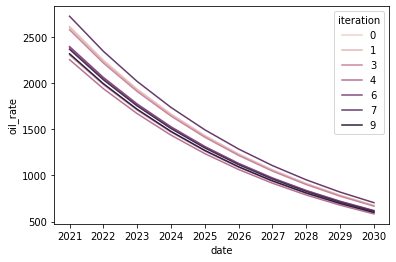

In [5]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration')

In [6]:
c1 = p1.generate_cashflow()

In [7]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
2021,39871.498594,39871.498594,-5.0,-4430.166510,-4435.166510,-70000.0,-70000.0,-34563.667917,-34563.667917
2022,37094.607733,37094.607733,-5.0,-4121.623081,-4126.623081,0.0,0.0,32967.984651,-1595.683266
2023,31927.624758,31927.624758,-5.0,-3547.513862,-3552.513862,0.0,0.0,28375.110896,26779.427630
2024,27512.634256,27512.634256,-5.0,-3056.959362,-3061.959362,0.0,0.0,24450.674894,51230.102525
2025,23680.343757,23680.343757,-5.0,-2631.149306,-2636.149306,0.0,0.0,21044.194451,72274.296975
2026,20349.587797,20349.587797,-5.0,-2261.065311,-2266.065311,0.0,0.0,18083.522486,90357.819461
2027,17515.052534,17515.052534,-5.0,-1946.116948,-1951.116948,0.0,0.0,15563.935586,105921.755047
2028,15093.049921,15093.049921,-5.0,-1677.005547,-1682.005547,0.0,0.0,13411.044375,119332.799422
2029,12990.708456,12990.708456,-5.0,-1443.412051,-1448.412051,0.0,0.0,11542.296405,130875.095827
2030,11999.198188,11999.198188,-5.0,-1333.244243,-1338.244243,0.0,0.0,10660.953945,141536.049772


In [8]:
p1.npv([0,0.1,0.15])

,npv,iteration
0.00,141536.049772,0
0.10,88403.072525,0
0.15,71233.446855,0
0.00,140387.144799,1
0.10,87542.765784,1
0.15,70466.397399,1
0.00,116371.634453,2
0.10,69559.811623,2
0.15,54432.796197,2
0.00,138498.068767,3


In [9]:
p1.irr(freq_output='A')

,irr
0,0.813635
1,0.803155
2,0.607343
3,0.786169
4,0.578141
5,0.654535
6,0.663533
7,0.898298
8,0.644899
9,0.615282


In [10]:
x = np.linspace(0,10,5)
print(x)

print(np.gradient(x,2))

[ 0.   2.5  5.   7.5 10. ]
[1.25 1.25 1.25 1.25 1.25]
